# ML analysis: BD vs MDD

In [1]:
# importing all the packages I need for all my models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import random
pd.options.mode.chained_assignment = None

## Transcripts for ML input

I used two sets of transcripts, each compared with a benchmark set of random transcripts, for ML input:

1. random transcripts compared with transcripts on the MT chromosome
2. random transcripts compared with transcripts with the GO term 'mitochondrial respirasome'

### Random transcripts

In [2]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=13)
randomtx_MTchr = ['ENST00000600080.5','ENST00000397572.5','ENST00000635877.1','ENST00000543942.6',
'ENST00000286494.9','ENST00000605544.1','ENST00000561852.5','ENST00000429670.3',
'ENST00000511500.1','ENST00000475796.5','ENST00000547135.5','ENST00000605689.1',
'ENST00000492310.5']

In [3]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=255)
randomtx_MTresp = ['ENST00000535515.5','ENST00000574494.1','ENST00000531227.1','ENST00000563462.1',
'ENST00000518450.5','ENST00000641655.1','ENST00000369669.5','ENST00000627703.2',
'ENST00000531427.5','ENST00000452554.3','ENST00000548524.5','ENST00000533270.1',
'ENST00000636277.1','ENST00000580806.5','ENST00000444189.7','ENST00000588683.1',
'ENST00000569320.5','ENST00000432343.1','ENST00000402297.6','ENST00000632698.1',
'ENST00000381286.7','ENST00000652439.1','ENST00000473413.1','ENST00000447555.5',
'ENST00000379651.7','ENST00000393867.5','ENST00000508053.5','ENST00000537833.5',
'ENST00000620667.1','ENST00000473647.1','ENST00000430838.2','ENST00000508208.5',
'ENST00000586762.2','ENST00000422787.1','ENST00000644629.1','ENST00000620127.3',
'ENST00000593411.1','ENST00000591228.4','ENST00000361733.7','ENST00000472541.5',
'ENST00000414977.5','ENST00000556079.1','ENST00000371208.4','ENST00000511891.5',
'ENST00000347401.7','ENST00000478640.6','ENST00000483371.1','ENST00000367058.7',
'ENST00000639822.1','ENST00000439752.1','ENST00000374885.5','ENST00000253925.11',
'ENST00000419015.1','ENST00000520992.5','ENST00000343599.5','ENST00000472864.1',
'ENST00000456906.5','ENST00000544168.5','ENST00000467490.5','ENST00000533498.1',
'ENST00000496105.1','ENST00000633965.1','ENST00000565585.5','ENST00000207636.9',
'ENST00000542832.1','ENST00000490348.1','ENST00000442232.1','ENST00000640582.2',
'ENST00000448958.2','ENST00000634908.1','ENST00000470954.2','ENST00000416465.5',
'ENST00000479323.1','ENST00000478224.5','ENST00000572244.5','ENST00000431286.1',
'ENST00000585531.1','ENST00000475994.1','ENST00000491728.5','ENST00000619532.1',
'ENST00000611198.4','ENST00000580145.5','ENST00000320665.10','ENST00000565546.5',
'ENST00000453375.1','ENST00000632533.1','ENST00000486535.1','ENST00000310078.12',
'ENST00000402399.6','ENST00000507142.5','ENST00000622674.1','ENST00000478475.5',
'ENST00000512818.5','ENST00000374840.8','ENST00000555573.5','ENST00000495742.5',
'ENST00000549451.1','ENST00000507115.5','ENST00000237163.9','ENST00000650921.1',
'ENST00000492457.1','ENST00000483378.1','ENST00000453856.5','ENST00000638438.1',
'ENST00000628302.2','ENST00000469014.1','ENST00000525605.1','ENST00000478680.1',
'ENST00000643493.1','ENST00000640045.1','ENST00000466375.2','ENST00000643537.1',
'ENST00000342669.7','ENST00000511593.6','ENST00000602622.5','ENST00000560913.1',
'ENST00000326183.3','ENST00000300870.15','ENST00000640690.1','ENST00000632297.1',
'ENST00000391411.10','ENST00000409324.7','ENST00000548732.2','ENST00000418576.3',
'ENST00000505441.1','ENST00000427822.6','ENST00000453515.1','ENST00000372183.7',
'ENST00000526686.1','ENST00000469169.5','ENST00000588492.5','ENST00000423263.5',
'ENST00000372611.5','ENST00000498836.5','ENST00000564132.1','ENST00000524603.1',
'ENST00000468878.1','ENST00000471097.1','ENST00000395305.7','ENST00000602865.1',
'ENST00000382315.7','ENST00000518154.5','ENST00000534783.1','ENST00000457662.2',
'ENST00000537562.5','ENST00000642520.1','ENST00000632958.1','ENST00000585879.1',
'ENST00000426266.5','ENST00000461659.1','ENST00000638304.1','ENST00000419794.1',
'ENST00000481453.5','ENST00000443437.6','ENST00000477695.5','ENST00000558092.1',
'ENST00000643264.1','ENST00000332826.7','ENST00000451587.5','ENST00000534760.1',
'ENST00000481032.1','ENST00000265689.9','ENST00000607208.1','ENST00000382032.3',
'ENST00000510299.2','ENST00000466626.1','ENST00000528628.5','ENST00000526842.5',
'ENST00000475405.2','ENST00000534688.2','ENST00000596682.5','ENST00000472867.2',
'ENST00000381567.8','ENST00000418646.5','ENST00000383130.7','ENST00000410040.5',
'ENST00000488876.5','ENST00000358912.5','ENST00000533695.1','ENST00000568545.5',
'ENST00000448299.6','ENST00000422720.2','ENST00000473946.1','ENST00000401672.7',
'ENST00000564192.5','ENST00000506646.5','ENST00000622731.4','ENST00000421470.1',
'ENST00000592814.5','ENST00000527790.5','ENST00000510493.5','ENST00000273590.3',
'ENST00000576460.5','ENST00000642399.1','ENST00000583328.5','ENST00000619160.4',
'ENST00000348261.11','ENST00000397472.6','ENST00000457841.5','ENST00000341686.7',
'ENST00000480859.5','ENST00000545955.5','ENST00000621629.4','ENST00000436730.7',
'ENST00000538766.1','ENST00000432228.1','ENST00000495855.1','ENST00000567921.1',
'ENST00000496784.1','ENST00000220531.7','ENST00000549482.1','ENST00000428931.6',
'ENST00000415077.1','ENST00000492838.1','ENST00000543539.1','ENST00000562008.5',
'ENST00000519082.5','ENST00000608830.5','ENST00000498181.6','ENST00000468607.1',
'ENST00000646379.1','ENST00000633452.1','ENST00000609658.1','ENST00000525990.1',
'ENST00000579140.5','ENST00000620763.1','ENST00000487389.5','ENST00000482397.1',
'ENST00000489123.1','ENST00000530553.1','ENST00000529311.5','ENST00000426683.5',
'ENST00000518855.5','ENST00000640831.1','ENST00000485277.1','ENST00000451664.1',
'ENST00000535955.5','ENST00000499453.2','ENST00000533651.1','ENST00000587646.1',
'ENST00000381392.5','ENST00000402105.7','ENST00000400318.6','ENST00000493625.5',
'ENST00000544078.2','ENST00000294337.7','ENST00000603850.1','ENST00000389574.7',
'ENST00000248054.9','ENST00000465841.1','ENST00000483949.1','ENST00000469838.5',
'ENST00000359866.9','ENST00000291700.9', 'ENST00000477078.2']

### Transcripts on MT chromosome

In [4]:
# reading in MT transcripts from MT chromosome
mt_tx = pd.read_csv("/Users/elenazhang/ncbi/public/sra/mt.txt", delimiter = "\t")
mt_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1
1,ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2
2,ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1
3,ENSG00000210082,ENSG00000210082.2,ENST00000387347,ENST00000387347.2
4,ENSG00000209082,ENSG00000209082.1,ENST00000386347,ENST00000386347.1


In [5]:
mt_tx_ids = mt_tx["Transcript stable ID version"].to_list()
print(mt_tx_ids)
len(mt_tx_ids)

['ENST00000387314.1', 'ENST00000389680.2', 'ENST00000387342.1', 'ENST00000387347.2', 'ENST00000386347.1', 'ENST00000361390.2', 'ENST00000387365.1', 'ENST00000387372.1', 'ENST00000387377.1', 'ENST00000361453.3', 'ENST00000387382.1', 'ENST00000387392.1', 'ENST00000387400.1', 'ENST00000387405.1', 'ENST00000387409.1', 'ENST00000361624.2', 'ENST00000387416.2', 'ENST00000387419.1', 'ENST00000361739.1', 'ENST00000387421.1', 'ENST00000361851.1', 'ENST00000361899.2', 'ENST00000362079.2', 'ENST00000387429.1', 'ENST00000361227.2', 'ENST00000387439.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000387441.1', 'ENST00000387449.1', 'ENST00000387456.1', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000387459.1', 'ENST00000361789.2', 'ENST00000387460.2', 'ENST00000387461.2']


37

### Transcripts with GO term 'mitochondrial respirasome'

In [6]:
mtres_tx = pd.read_csv("/Volumes/horizons/mart_export_mtrespirasome.txt", delimiter = "\t")
mtres_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
1,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
2,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
3,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
4,ENSG00000198763,ENSG00000198763.3,ENST00000361453,ENST00000361453.3


In [7]:
mtres_tx_ids = mtres_tx["Transcript stable ID version"].to_list()
print(mtres_tx_ids)
len(mtres_tx_ids)

['ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361739.1', 'ENST00000362079.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361335.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000361789.2', 'ENST00000361789.2', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000607132.1', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000605927.3', 'ENST00000630511.1', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST0000062

881

## Metadata and matrix preparation

In [8]:
matrix_BDMDD = pd.read_csv("/Volumes/horizons/test/5_analysis/sleuth_matrix.csv")

In [9]:
# reorganising matrix
matrix_BDMDD_T = matrix_BDMDD.T
matrix_BDMDD_T.columns = matrix_BDMDD_T.iloc[0]
matrix_BDMDD_T = matrix_BDMDD_T[1:]
matrix_BDMDD_T = matrix_BDMDD_T.reset_index()
matrix_BDMDD_T.head()

Unnamed: 0,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652760.1,ENST00000652762.1,ENST00000652763.1,ENST00000652764.1,ENST00000652765.1,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1
0,SRR3438571,2414.9758,1258.679609,1168.694231,3922.235614,195.576679,197.701468,251.011275,5226.567165,375.035978,...,17.281201,504.879184,5.671888,92.952791,8.283398,0.0,35.543724,0.0,16.225814,26.81581
1,SRR3438572,2379.993725,1277.923866,924.701619,3869.799276,254.744542,185.217693,251.637807,5402.48077,353.006127,...,22.959496,514.799629,10.421294,97.150918,0.0,0.0,15.114433,0.0,17.592902,21.573966
2,SRR3438573,2207.416424,1207.112307,836.842953,7103.47032,326.934964,264.079468,133.156167,6413.338902,255.252165,...,31.227847,482.730411,2.023268,142.270946,0.0,0.0,19.554862,0.0,0.0,12.023539
3,SRR3438574,2223.602468,1237.824128,1217.379221,7002.840073,423.515843,277.929935,151.668686,6471.767178,263.176594,...,1.834613,456.161633,0.0,154.834236,8.254877,0.0,16.12462,0.0,0.0,20.167846
4,SRR3438576,2104.669096,1300.771977,1402.092826,3924.518862,753.735989,236.309892,194.963946,5762.095597,260.236177,...,0.0,445.805252,0.0,49.375253,0.0,0.0,29.321339,2.842503,0.0,72.740651


In [10]:
# reading in metadata for BD and MDD samples
metadata_BDMDD = pd.read_csv("/Volumes/horizons/test/5_metadata/metadata.txt", delimiter = "\t")
metadata_BDMDD.head()

,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,BD,69,male,Caucasian
2,SRR3438573,MDD,48,female,Caucasian
3,SRR3438574,MDD,48,female,Caucasian
4,SRR3438576,MDD,46,male,Caucasian


In [11]:
# merging matrix with metadata
matrix_metadata_BDMDD = matrix_BDMDD_T.merge(metadata_BDMDD, left_on="index", right_on="sample")
matrix_metadata_BDMDD.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,2414.9758,1258.679609,1168.694231,3922.235614,195.576679,197.701468,251.011275,5226.567165,375.035978,...,0.0,35.543724,0.0,16.225814,26.81581,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,2379.993725,1277.923866,924.701619,3869.799276,254.744542,185.217693,251.637807,5402.48077,353.006127,...,0.0,15.114433,0.0,17.592902,21.573966,SRR3438572,BD,69,male,Caucasian
2,SRR3438573,2207.416424,1207.112307,836.842953,7103.47032,326.934964,264.079468,133.156167,6413.338902,255.252165,...,0.0,19.554862,0.0,0.0,12.023539,SRR3438573,MDD,48,female,Caucasian
3,SRR3438574,2223.602468,1237.824128,1217.379221,7002.840073,423.515843,277.929935,151.668686,6471.767178,263.176594,...,0.0,16.12462,0.0,0.0,20.167846,SRR3438574,MDD,48,female,Caucasian
4,SRR3438576,2104.669096,1300.771977,1402.092826,3924.518862,753.735989,236.309892,194.963946,5762.095597,260.236177,...,0.0,29.321339,2.842503,0.0,72.740651,SRR3438576,MDD,46,male,Caucasian


In [12]:
# making the covariates binary values
matrix_metadata_BDMDD['gender_binary'] = matrix_metadata_BDMDD['gender'].replace({'female':0, 'male':1})
matrix_metadata_BDMDD['ethnicity_binary'] = np.where(
    matrix_metadata_BDMDD["ethnicity"] == "Caucasian", 1, 0)
matrix_metadata_BDMDD['diagnosis_binary'] = matrix_metadata_BDMDD['clinical_diagnosis'].replace({'BD':1, 'MDD':0})
matrix_metadata_BDMDD.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity,gender_binary,ethnicity_binary,diagnosis_binary
0,SRR3438571,2414.9758,1258.679609,1168.694231,3922.235614,195.576679,197.701468,251.011275,5226.567165,375.035978,...,16.225814,26.81581,SRR3438571,BD,69,male,Caucasian,1,1,1
1,SRR3438572,2379.993725,1277.923866,924.701619,3869.799276,254.744542,185.217693,251.637807,5402.48077,353.006127,...,17.592902,21.573966,SRR3438572,BD,69,male,Caucasian,1,1,1
2,SRR3438573,2207.416424,1207.112307,836.842953,7103.47032,326.934964,264.079468,133.156167,6413.338902,255.252165,...,0.0,12.023539,SRR3438573,MDD,48,female,Caucasian,0,1,0
3,SRR3438574,2223.602468,1237.824128,1217.379221,7002.840073,423.515843,277.929935,151.668686,6471.767178,263.176594,...,0.0,20.167846,SRR3438574,MDD,48,female,Caucasian,0,1,0
4,SRR3438576,2104.669096,1300.771977,1402.092826,3924.518862,753.735989,236.309892,194.963946,5762.095597,260.236177,...,0.0,72.740651,SRR3438576,MDD,46,male,Caucasian,1,1,0


In [13]:
# making a list of transcripts in matrix/metadata dataframe
tx_BDMDD = list(matrix_metadata_BDMDD)
tx_BDMDD

['index',
 'ENST00000000233.10',
 'ENST00000000412.8',
 'ENST00000000442.11',
 'ENST00000001008.6',
 'ENST00000001146.6',
 'ENST00000002125.9',
 'ENST00000002165.10',
 'ENST00000002501.10',
 'ENST00000002596.6',
 'ENST00000002829.8',
 'ENST00000003084.10',
 'ENST00000003100.13',
 'ENST00000003302.8',
 'ENST00000003583.12',
 'ENST00000003912.7',
 'ENST00000004103.8',
 'ENST00000004531.14',
 'ENST00000004982.6',
 'ENST00000005082.13',
 'ENST00000005178.6',
 'ENST00000005180.8',
 'ENST00000005226.12',
 'ENST00000005257.7',
 'ENST00000005259.8',
 'ENST00000005260.9',
 'ENST00000005284.3',
 'ENST00000005286.8',
 'ENST00000005340.10',
 'ENST00000005374.10',
 'ENST00000005386.8',
 'ENST00000005558.8',
 'ENST00000005756.4',
 'ENST00000005995.8',
 'ENST00000006015.3',
 'ENST00000006053.7',
 'ENST00000006251.11',
 'ENST00000006275.8',
 'ENST00000006658.11',
 'ENST00000006724.7',
 'ENST00000006750.7',
 'ENST00000006777.11',
 'ENST00000007264.7',
 'ENST00000007390.3',
 'ENST00000007414.8',
 'ENST0

## Subsetting to transcripts

### Subsetting to random transcripts for MT chromosome

In [14]:
randintersection_BDMDD = list(set(tx_BDMDD).intersection(set(randomtx_MTchr)))
randintersection_BDMDD

['ENST00000605544.1',
 'ENST00000429670.3',
 'ENST00000492310.5',
 'ENST00000635877.1',
 'ENST00000605689.1',
 'ENST00000547135.5',
 'ENST00000543942.6',
 'ENST00000397572.5',
 'ENST00000561852.5',
 'ENST00000511500.1',
 'ENST00000286494.9',
 'ENST00000475796.5',
 'ENST00000600080.5']

In [15]:
# subsetting matrix/metadata file to MT transcripts and covariates
randsubset_BDMDD = matrix_metadata_BDMDD[randomtx_MTchr+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randsubset_BDMDD.head()

,ENST00000600080.5,ENST00000397572.5,ENST00000635877.1,ENST00000543942.6,ENST00000286494.9,ENST00000605544.1,ENST00000561852.5,ENST00000429670.3,ENST00000511500.1,ENST00000475796.5,ENST00000547135.5,ENST00000605689.1,ENST00000492310.5,gender_binary,ethnicity_binary,age_at_death
0,0.0,73.256703,19.732691,0.0,2554.875378,0.0,5.053553,0.0,0.0,0.0,2.71026,27.765386,39.591697,1,1,69
1,0.0,65.906933,47.612254,0.0,2535.593452,0.700606,4.420776,0.0,0.0,0.0,5.114568,26.333871,40.639603,1,1,69
2,0.0,82.06784,225.316085,0.0,2654.805257,0.0,0.0,0.0,0.0,0.0,0.0,35.081721,47.57117,0,1,48
3,0.0,70.498639,52.977278,0.0,2375.43164,0.0,0.0,0.0,0.0,0.0,8.719499,30.301283,37.492746,0,1,48
4,0.0,63.06206,6.495082,2.12344,3992.68657,0.0,11.151176,0.0,0.0,0.0,0.0,20.418446,64.433706,1,1,46


In [16]:
# input/output info
x = randsubset_BDMDD
y = matrix_metadata_BDMDD["clinical_diagnosis"].replace({"BD":1, "MDD":0})

### Subsetting to transcripts on MT chromosome

In [17]:
# finding MT transcripts that are in the BDMDD transcripts
MTintersection_BDMDD = list(set(tx_BDMDD).intersection(set(mt_tx_ids)))
MTintersection_BDMDD

['ENST00000362079.2',
 'ENST00000361335.1',
 'ENST00000361390.2',
 'ENST00000361851.1',
 'ENST00000361381.2',
 'ENST00000361453.3',
 'ENST00000361681.2',
 'ENST00000361624.2',
 'ENST00000361899.2',
 'ENST00000361227.2',
 'ENST00000361739.1',
 'ENST00000361567.2',
 'ENST00000361789.2']

In [18]:
# subsetting matrix/metadata file to MT transcripts and covariates
MTsubset_BDMDD = matrix_metadata_BDMDD[MTintersection_BDMDD+['gender_binary', 'ethnicity_binary', 'age_at_death']]
MTsubset_BDMDD.head()

,ENST00000362079.2,ENST00000361335.1,ENST00000361390.2,ENST00000361851.1,ENST00000361381.2,ENST00000361453.3,ENST00000361681.2,ENST00000361624.2,ENST00000361899.2,ENST00000361227.2,ENST00000361739.1,ENST00000361567.2,ENST00000361789.2,gender_binary,ethnicity_binary,age_at_death
0,147427.200135,33764.785401,269527.994863,16657.358977,511650.603161,206739.518781,38970.313886,924168.535741,190685.250327,19979.646102,159502.651199,199067.027667,159909.750465,1,1,69
1,148009.502592,34250.956573,269189.142034,17337.355757,513141.717418,208846.636029,39712.984821,931764.478758,192921.862327,20108.551618,159944.84421,199797.120213,162056.84187,1,1,69
2,160774.333289,37177.080841,269972.369456,16102.129577,695469.382588,198427.451774,34166.28936,881090.149692,210641.662834,17961.982189,168059.615853,170676.44031,259316.123411,0,1,48
3,161304.520782,37302.175074,269719.614455,16309.012218,698846.619463,199495.356223,34311.037,883949.174758,212678.29667,17716.958774,167853.978496,171254.300131,260695.806498,0,1,48
4,241419.40563,56040.932833,430099.50331,33077.967518,992595.416299,352941.499144,59827.452034,1751563.600209,328171.515195,29078.698348,226541.511514,307019.903177,389659.215531,1,1,46


In [24]:
# input/output info
x = MTsubset_BDMDD
y = matrix_metadata_BDMDD["clinical_diagnosis"].replace({"BD":1, "MDD":0})

### Subsetting to random transcripts for MT respirasome

In [19]:
# random transcripts for MT respirasome
randMTresp_BDMDD = list(set(tx_BDMDD).intersection(set(randomtx_MTresp)))
len(randMTresp_BDMDD)

255

In [20]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTrespsubset_BDMDD = matrix_metadata_BDMDD[randomtx_MTresp+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTrespsubset_BDMDD.head()

,ENST00000535515.5,ENST00000574494.1,ENST00000531227.1,ENST00000563462.1,ENST00000518450.5,ENST00000641655.1,ENST00000369669.5,ENST00000627703.2,ENST00000531427.5,ENST00000452554.3,...,ENST00000248054.9,ENST00000465841.1,ENST00000483949.1,ENST00000469838.5,ENST00000359866.9,ENST00000291700.9,ENST00000477078.2,gender_binary,ethnicity_binary,age_at_death
0,0.0,0.0,0.0,349.317161,10.588849,86.327205,7.339763,0.0,0.0,71.17673,...,4590.606581,0.0,0.0,105.776708,1021.728785,1872.698741,15.194791,1,1,69
1,0.0,0.0,3.585986,286.269321,4.583058,79.049786,0.000165,6.376079,0.0,113.922555,...,4803.014993,0.0,0.0,150.327033,980.009916,1922.211402,5.561291,1,1,69
2,0.0,0.0,0.0,312.550588,13.610426,113.697857,8.790089,0.0,0.0,145.699482,...,7625.144248,0.0,0.0,57.760251,1186.757656,807.012663,14.896458,0,1,48
3,0.0,0.0,0.0,326.480031,16.556373,98.823169,7.406168,0.0,0.0,118.284441,...,7767.037359,0.487713,0.0,80.037692,1143.555629,687.390379,9.754954,0,1,48
4,0.0,0.0,0.0,242.019368,21.923279,73.075293,0.0,1.024426,0.0,159.014825,...,6384.500268,0.0,0.0,144.509013,949.055655,1128.105048,9.291249,1,1,46


In [28]:
# input/output info
x = randMTrespsubset_BDMDD
y = matrix_metadata_BDMDD["clinical_diagnosis"].replace({"BD":1, "MDD":0})

### Subsetting to transcripts with GO term 'mitochondrial respirasome'

In [21]:
mtresintersection_BDMDD = list(set(tx_BDMDD).intersection(set(mtres_tx_ids)))
mtresintersection_BDMDD

['ENST00000591899.8',
 'ENST00000553514.5',
 'ENST00000647561.1',
 'ENST00000392111.7',
 'ENST00000423725.5',
 'ENST00000355591.8',
 'ENST00000565078.5',
 'ENST00000358227.5',
 'ENST00000327772.7',
 'ENST00000619763.4',
 'ENST00000628198.1',
 'ENST00000650309.2',
 'ENST00000529927.5',
 'ENST00000342751.8',
 'ENST00000502506.6',
 'ENST00000433898.5',
 'ENST00000307300.8',
 'ENST00000459637.2',
 'ENST00000438807.7',
 'ENST00000476279.5',
 'ENST00000449699.5',
 'ENST00000422029.6',
 'ENST00000592141.6',
 'ENST00000615238.4',
 'ENST00000362079.2',
 'ENST00000520271.5',
 'ENST00000304863.6',
 'ENST00000379847.8',
 'ENST00000539387.5',
 'ENST00000566405.5',
 'ENST00000620478.2',
 'ENST00000523920.1',
 'ENST00000392169.6',
 'ENST00000401406.3',
 'ENST00000412366.5',
 'ENST00000330029.6',
 'ENST00000621307.1',
 'ENST00000523016.1',
 'ENST00000475465.1',
 'ENST00000373335.4',
 'ENST00000370320.4',
 'ENST00000620289.4',
 'ENST00000610975.4',
 'ENST00000237889.9',
 'ENST00000617122.1',
 'ENST0000

In [22]:
# subsetting matrix/metadata file to MT transcripts and covariates
mtressubset_BDMDD = matrix_metadata_BDMDD[mtresintersection_BDMDD+['gender_binary', 'ethnicity_binary', 'age_at_death']]
mtressubset_BDMDD.head()

,ENST00000591899.8,ENST00000553514.5,ENST00000647561.1,ENST00000392111.7,ENST00000423725.5,ENST00000355591.8,ENST00000565078.5,ENST00000358227.5,ENST00000327772.7,ENST00000619763.4,...,ENST00000483273.2,ENST00000589970.5,ENST00000564544.1,ENST00000506765.1,ENST00000518406.5,ENST00000564903.1,ENST00000311672.10,gender_binary,ethnicity_binary,age_at_death
0,514.980484,28.731096,15.580012,0.0,33.512588,0.0,1.608298,474.269684,396.474476,9.531296,...,38.776251,0.0,7.652749,0.0,53.626454,20.974125,1046.730494,1,1,69
1,483.828086,15.437355,7.253296,0.0,40.366364,0.0,1.491141,527.213,413.360784,7.737374,...,58.252491,0.0,6.652302,5.021854,21.622377,64.968361,1060.954093,1,1,69
2,500.104793,18.875068,3.743803,0.0,31.445156,0.0,1.546044,495.820269,382.303257,3.305994,...,65.203705,0.0,13.726909,12.414702,51.153444,91.422392,883.810545,0,1,48
3,481.88852,18.051665,6.96534,0.0,19.891217,0.0,1.446776,475.516138,328.914661,8.420386,...,55.376996,0.0,13.818369,4.040563,47.087586,26.465232,867.095476,0,1,48
4,532.750832,3.576241,13.058202,0.0,75.507181,0.0,1.794046,519.563165,353.893848,4.997488,...,49.078043,0.0,4.92515,6.285748,82.5463,46.42467,1051.337116,1,1,46


In [31]:
# input/output info
x = mtressubset_BDMDD
y = matrix_metadata_BDMDD["clinical_diagnosis"].replace({"BD":1, "MDD":0})

## ML model creation: Logistic regression

In [58]:
# sub in matrix/metadata file with subsetted mt
X = randsubset_BDMDD
Y = matrix_metadata_BDMDD[["diagnosis_binary"]]

In [59]:
# dividing data into training and testing data
# stratify = y argument splits test data evenly between both binary outcomes
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [60]:
# creating a logistic regression model
logit = LogisticRegression(solver="lbfgs", max_iter=5000)
logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=5000)

In [61]:
# conducting a test
y_pred = logit.predict(x_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 1, 0, 0])

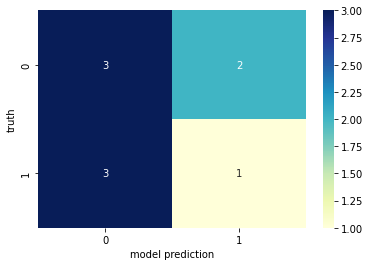

In [62]:
# creating a confusion matrix to see where the model predicted correctly/incorrectly
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [38]:
accuracy_score(y_test, y_pred)

0.4444444444444444

## Neural network

In [109]:
# specify input + output again
X = mtressubset_BDMDD
Y = matrix_metadata_BDMDD[["diagnosis_binary"]]

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_train).astype(np.float32)

In [111]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
history = model.fit(x_train, y_train, epochs=200,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 1s 91ms/step - loss: 11922.1357 - accuracy: 0.5385 - val_loss: 22430.6621 - val_accuracy: 0.2857
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 7467.2178 - accuracy: 0.5385 - val_loss: 13431.5801 - val_accuracy: 0.2857
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 3288.6372 - accuracy: 0.6154 - val_loss: 4065.4368 - val_accuracy: 0.2857
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 989.2758 - accuracy: 0.6923 - val_loss: 546.0114 - val_accuracy: 0.7143
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 2081.9194 - accuracy: 0.6154 - val_loss: 725.8231 - val_accuracy: 0.7143
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 1832.3362 - accuracy: 0.6923 - val_loss: 935.5475 - val_accuracy: 0.4286
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 671.5515 - accuracy: 0.8077 - val_loss: 2778.8699 - v

3/3 [==============================] - 0s 19ms/step - loss: 226.0103 - accuracy: 0.7692 - val_loss: 1023.6627 - val_accuracy: 0.4286
Epoch 114/200
3/3 [==============================] - 0s 17ms/step - loss: 232.7682 - accuracy: 0.8077 - val_loss: 724.6255 - val_accuracy: 0.4286
Epoch 115/200
3/3 [==============================] - 0s 15ms/step - loss: 271.0927 - accuracy: 0.8462 - val_loss: 1321.9437 - val_accuracy: 0.2857
Epoch 116/200
3/3 [==============================] - 0s 16ms/step - loss: 327.9030 - accuracy: 0.6538 - val_loss: 1539.9635 - val_accuracy: 0.2857
Epoch 117/200
3/3 [==============================] - 0s 17ms/step - loss: 269.8567 - accuracy: 0.7308 - val_loss: 717.3247 - val_accuracy: 0.4286
Epoch 118/200
3/3 [==============================] - 0s 17ms/step - loss: 337.9284 - accuracy: 0.8462 - val_loss: 803.2281 - val_accuracy: 0.4286
Epoch 119/200
3/3 [==============================] - 0s 16ms/step - loss: 277.7008 - accuracy: 0.7692 - val_loss: 1297.8010 - val_accur

3/3 [==============================] - 0s 30ms/step - loss: 149.2174 - accuracy: 0.8077 - val_loss: 917.7648 - val_accuracy: 0.2857
Epoch 170/200
3/3 [==============================] - 0s 18ms/step - loss: 124.7287 - accuracy: 0.8077 - val_loss: 1682.2635 - val_accuracy: 0.1429
Epoch 171/200
3/3 [==============================] - 0s 17ms/step - loss: 222.7980 - accuracy: 0.6538 - val_loss: 989.1929 - val_accuracy: 0.2857
Epoch 172/200
3/3 [==============================] - 0s 16ms/step - loss: 100.7601 - accuracy: 0.8846 - val_loss: 874.2416 - val_accuracy: 0.2857
Epoch 173/200
3/3 [==============================] - 0s 17ms/step - loss: 98.3541 - accuracy: 0.8846 - val_loss: 1076.7543 - val_accuracy: 0.1429
Epoch 174/200
3/3 [==============================] - 0s 83ms/step - loss: 112.8338 - accuracy: 0.6923 - val_loss: 808.8846 - val_accuracy: 0.2857
Epoch 175/200
3/3 [==============================] - 0s 30ms/step - loss: 138.4547 - accuracy: 0.8846 - val_loss: 779.4736 - val_accuracy

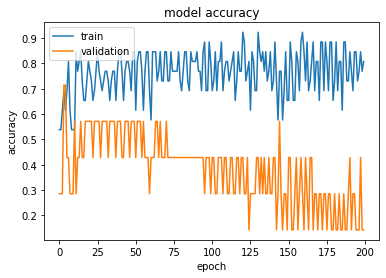

In [114]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

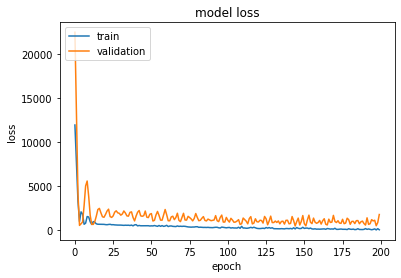

In [115]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [116]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[584.1166381835938, 0.4848484992980957]

In [117]:
predictions = model.predict(x_test)
predictions.round(1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [118]:
np.rint(predictions)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

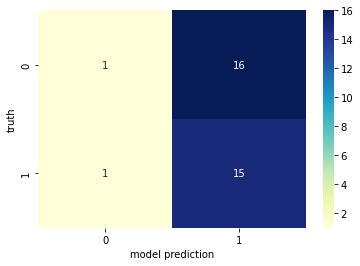

In [119]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## Lasso

In [88]:
# specify input + output again
X = mtressubset_BDMDD
y = matrix_metadata_BDMDD["clinical_diagnosis"].replace({"BD":1, "MDD":0})

In [89]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [90]:
clf = LogisticRegression(solver='liblinear', max_iter=5000, penalty="l1")
clf.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')

In [91]:
# conducting a test
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0])

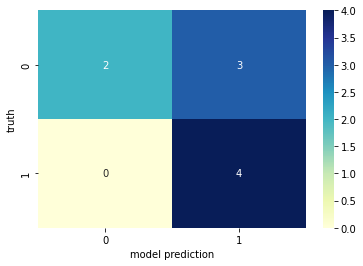

In [92]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [93]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [94]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 0.0590762   0.05506655  0.01230121  0.29365153  0.00067117  0.
  -0.00493944 -0.14158346 -0.51051144  0.          0.         -0.0867557
  -0.09440554  0.40148623  0.         -0.00254566]]


In [64]:
print(x)

   ENST00000600080.5 ENST00000397572.5 ENST00000635877.1 ENST00000543942.6  \
0                0.0         73.256703         19.732691               0.0   
1                0.0         65.906933         47.612254               0.0   
2                0.0          82.06784        225.316085               0.0   
3                0.0         70.498639         52.977278               0.0   
4                0.0          63.06206          6.495082           2.12344   
5                0.0         84.034451        148.273404               0.0   
6           9.208632         63.503676         50.574208               0.0   
7                0.0         63.753979         59.145087          0.000001   
8                0.0         62.750045          0.000008          2.638332   
9                0.0         74.501007        121.080334               0.0   
10               0.0         74.825163         15.811289               0.0   
11               0.0         48.431713          0.001548        

### Lasso + CV

In [95]:
clf = LogisticRegressionCV(solver='liblinear', max_iter=5000, penalty="l1", cv=15)
clf.fit(x.values, y.values)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegressionCV(cv=15, max_iter=5000, penalty='l1', solver='liblinear')

In [96]:
y_pred = clf.predict(x)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [97]:
clf.score(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


0.6428571428571429

In [98]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 0.          0.00422243  0.00080126  0.         -0.00016008  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]


### Boxplots of important Lasso features

<AxesSubplot:xlabel='diagnosis_binary', ylabel='ENST00000511500.1'>

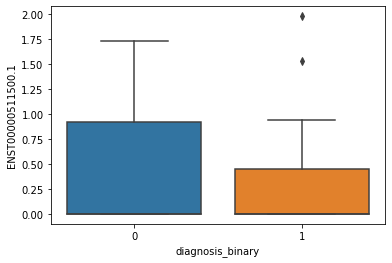

In [65]:
matrix_metadata_BDMDD['ENST00000511500.1']
sns.boxplot(x=matrix_metadata_BDMDD['diagnosis_binary'], y=matrix_metadata_BDMDD['ENST00000511500.1'])